# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [3]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2022-02-07 04:42:30--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-02-07 04:42:30 (467 MB/s) - ‘test.dat’ saved [2844/2844]

--2022-02-07 04:42:30--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2022-02-07 04:42:30 (234 MB/s) - ‘train.dat’ saved [11244/11244]



In [4]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [1]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()[1:]   #skip index 0
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [1] + instance #appends a list with a single element 1 at the beginning of the instance list
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    dot_result = sum([array1[i]*array2[i] for i in range(len(array1))])   #iterates through the two lists taking the sum of the multiplied indices, needs to len of array1 since array2 has the label at the end
    return dot_result 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    sigmoid_result = (1 / (1 + math.exp(-x)))   #I had to lookup the math function instead of using numpy but I tested this works
    return sigmoid_result

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    output_result = sigmoid(dot_product(weights, instance))  #it occurs to me I could've shortened a line and put some of this in the return instead of defining a new variable, but it does add readability
    return output_result

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if output(weights, instance) >=.5: #simple if else statement with conditional
      label = 1
    else:
      label = 0
    return label


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # Initializing the weights to a 0 vector, similar to using np.zeroes with the defined size. I think in lecture we also discussed using random numbers here as a possibility, but were told it's basically as good to start with 0
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # Multiplying the weights by the instance vector
            # Forward step, checking the value against the known label to find the error.
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            # Weights update by gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

Gradient descent uses the error and the perceptron's output. Using predict returns only binary hard labels, so the error we calculate with predict will not be correct, and therefore our weight updates will also be incorrect. We need the sigmoid activation function to be used in each iteration to be able to learn.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

accuracy_list = []
for tr_size in tr_percent:
  best_accuracy = -1
  for lr in lr_array:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      if accuracy > best_accuracy:
        best_accuracy = accuracy
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
  accuracy_list.append(best_accuracy)

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learni

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A) Not always, but it is a best practice when possible. Basically, more data is better but there is a diminishing return as you approach the limits of the data and the model. That makes sense theoretically, but we also see that in the above lines ran. When lr = 400 (100% of the data), we get to the 80% accuracy faster. It is possible to reach peak accuracy with a fraction of the data set with more epochs. In the simple plot below, you see that as percent of data increases so do our best accuracies. We hit peak at 80% data but that needed more epochs to reach than we needed at 100% data though both were able to hit the same accuracy.

B) The learning rate is too low that the weights don't have enough iterations to be updated to better values in only 20 epochs. If we fetch the line that keeps epochs and learning rate constant while only using more training data

tr: 200, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 78.0

We see the accuracy of 78.0 gained. 
We can see with such a low learning rate as 0.005 that you need more epochs. But with double the data and 1/10th the learning the rate, only going to 50 epochs is enough to start seeing improved accuracy

tr: 300, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 74.0

C) It does not appear so. I attempted to play with the hyperparameters by hand, but I did not code a hyperparameter search iteration and let it run. At a cursory glance, it appears we are approaching an upper limit. That seems to imply it is a limitation of the model. Earlier improvements give higher gains than later improvements (with more data, more epochs, etc.) so if 80% could be exceeded then we would expect it to be diminishing returns.

D) Not always, no. But it is worth it to err on the side of more epochs than fewer epochs. If you run too few, you will lose out on improved accuracy. If you run too many, then you will see repeated accuracy levels at the cost of only computing cycles. That is inefficient, so there is no reason to set epochs: 1000000 because that will be wasteful in time and energy. 


<function matplotlib.pyplot.show>

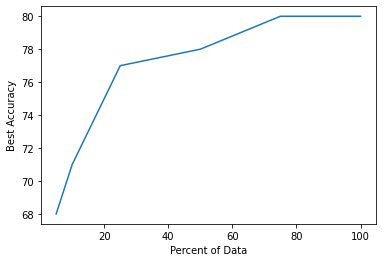

In [8]:
import matplotlib.pyplot as plt

plt.plot(tr_percent, accuracy_list)
plt.xlabel("Percent of Data")
plt.ylabel("Best Accuracy")
plt.show